In [4]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [10]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Collecting yfinance
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.5-py3-none-any.whl size=138681 sha256=4f4b65a9ae7e3706d06ac157ac20deab13979f3394c8f71efe69654e821aced7
  Stored in directory: c:\users\ivun\appdata\local\pip\cache\wheels\95\bd\4e\15d1893c245357e4d2353e77456c0be9561d1942ed9fe664ca
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled req

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


In [16]:
import yfinance as yf

PG = yf.download('PG', start='1995-01-01')

[*********************100%%**********************]  1 of 1 completed


In [17]:
PG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-08-10,14.80,15.54,14.60,15.270000,14.757251,4659200
2005-08-11,15.25,15.89,15.25,15.500000,14.979527,337800
2005-08-12,15.30,16.35,15.30,16.049999,15.511059,171300
2005-08-15,16.00,16.33,14.75,16.049999,15.511059,300100
2005-08-16,15.75,16.10,15.75,16.100000,15.559381,98600


In [18]:
PG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-27,269.649994,271.470001,268.040009,271.070007,271.070007,143300
2024-06-28,271.989990,274.440002,267.029999,269.779999,269.779999,313800
2024-07-01,272.799988,273.230011,267.859985,267.980011,267.980011,177700
2024-07-02,268.269989,271.070007,267.720001,270.750000,270.750000,125600
2024-07-03,271.269989,274.160004,269.600006,273.950012,273.950012,96300


In [19]:
PG['simple_return'] = (PG['Adj Close']/PG['Adj Close'].shift(1))-1
#(TODAYS CLOSING PRICE/YESTERDAYS CLOSING PRICE) -1 is simple rate of return
print(PG['simple_return'])

Date
2005-08-10         NaN
2005-08-11    0.015062
2005-08-12    0.035484
2005-08-15    0.000000
2005-08-16    0.003115
                ...   
2024-06-27    0.008558
2024-06-28   -0.004759
2024-07-01   -0.006672
2024-07-02    0.010337
2024-07-03    0.011819
Name: simple_return, Length: 4756, dtype: float64


AttributeError: 'AxesSubplot' object has no attribute 'show'

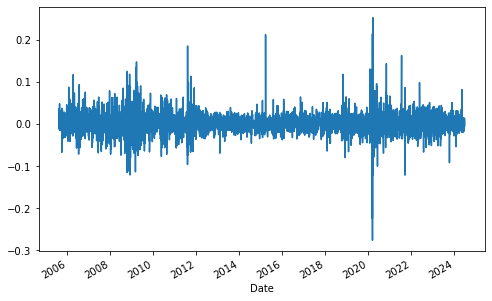

In [20]:
PG['simple_return'].plot(figsize=(8,5)).show()

In [21]:
#Calculate Average rate of return
avg_returns_d= PG['simple_return'].mean()
print(avg_returns_d)

0.000920564167291519


In [22]:
# well we have 250 trading days usually
avg_returns_a= PG['simple_return'].mean() * 250
print(avg_returns_a)

0.23014104182287975


In [23]:
print(str(round(avg_returns_a,5) * 100) + ' %')

23.014000000000003 %


In [24]:
#from jan 3, 1995 to July 3 2024 P&G have a 12.794 % simple Rate of return, which is decent over 